In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Load the iris dataset
data = load_iris()
X = data.data
y = data.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Logistic Regression model        
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 100.00%


In [3]:
# fine tuni ning. --- KNN ==> best value of k

## LR from Scratch 

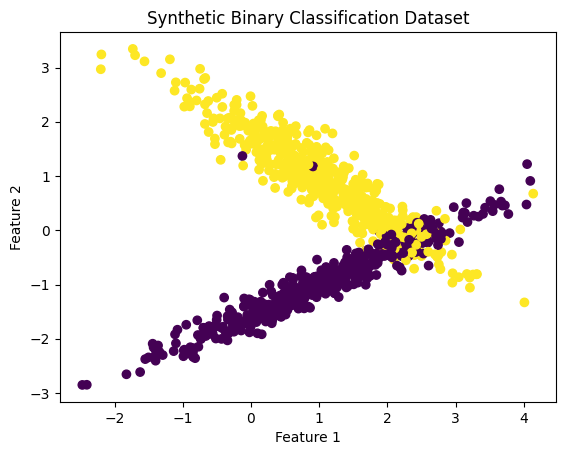

In [4]:
# lets implement LR from scratch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification    
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


sigmoid(0)

np.float64(0.5)

In [8]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# define logistic regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    

    

In [9]:
# lets train and evaluate our scratch model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Logistic Regression model from scratch        
model_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
# Train the model
model_scratch.fit(X_train, y_train)
# Make predictions
y_pred_scratch = model_scratch.predict(X_test)
# Evaluate the model
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Scratch Model Accuracy: {accuracy_scratch * 100:.2f}%")

Scratch Model Accuracy: 90.00%


### Hyperparameter tunning

In [10]:
# lets explore hyperparameter tuning
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train, y_train)
# accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


In [11]:
# lets try to tune it using gridsearch cv
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_
print(best_model)


Best parameters: {'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_a

In [12]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# lets train the best model and evaluate
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")

Best Model Accuracy: 90.00%


### References
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 - https://www.analyticsvidhya.com/blog/2021/05/bayesian-optimization-bayes_opt-or-hyperopt/
 - https://www.datacamp.com/tutorial/multicollinearity

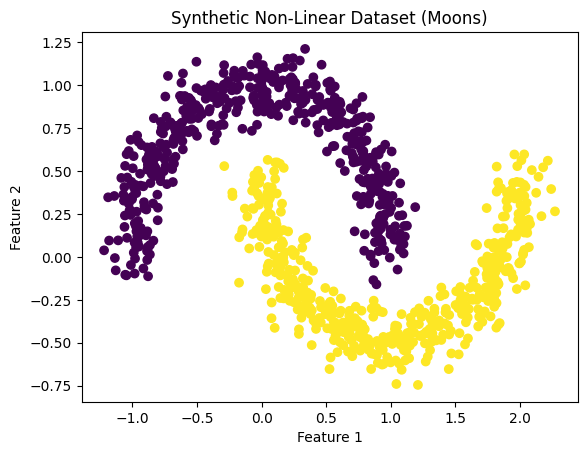

In [11]:
# logistics regression in case of nonlinear data
from sklearn.datasets import make_moons
# Generate a synthetic non-linear dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Non-Linear Dataset (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
# lets create the pandas dataframe for better understanding
import pandas as pd
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
df.head()

,Feature 1,Feature 2,Target
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


In [13]:
# lets try to fit logistic regression on this nonlinear data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_train, y_train)
y_pred_nonlinear = model_nonlinear.predict(X_test)
accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
accuracy_nonlinear

/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


0.88

In [14]:
# lets do some FE to convert nonlinear to linear data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
# Split the transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
# Train logistic regression on transformed data
model_poly = LogisticRegression()
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_poly

/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/rahultiwari/Docu

0.99

/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


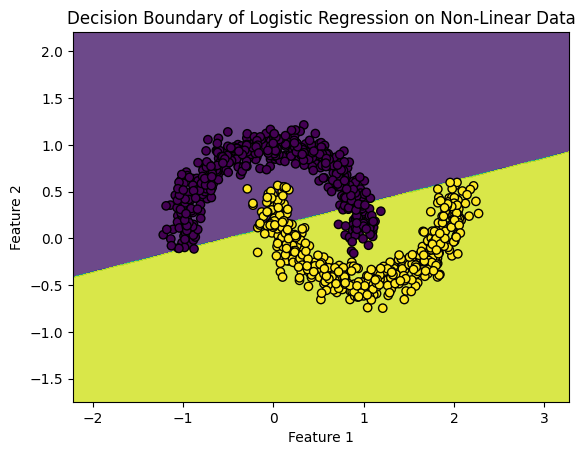

In [15]:
# lets plot decision boundary for nonlinear data
import numpy as np  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_nonlinear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Decision Boundary of Logistic Regression on Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rahultiwari/Documents/02_Freelancing/rbyte_ai_engineering/ai-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


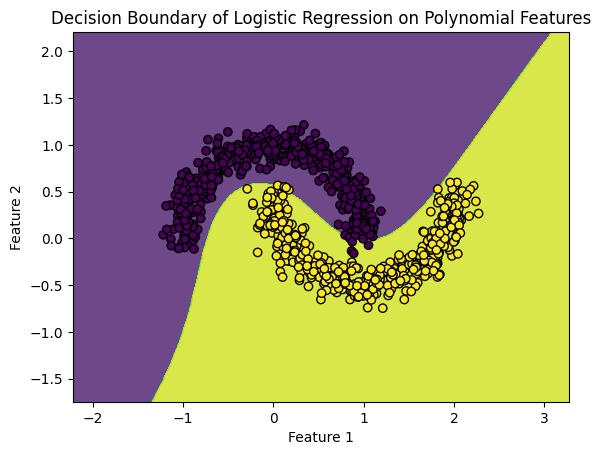

In [16]:
# similarly plot decision boundary for polynomial features
Z_poly = model_poly.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Decision Boundary of Logistic Regression on Polynomial Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:
# Conclussion:
# Logistic Regression works well for linear data but struggles with non-linear data.
# By applying polynomial feature transformation, we can convert non-linear data into a form that Logistic Regression
# can handle more effectively, leading to improved classification performance.
